### Experiment: Determine relative tokenizer performance

#### Set-up:

* Read/tokenize 5M emoji tweets, measuring tokenization rate per sec
* Stop after around 300,000 tweets or until "enough time" has passed

#### Notes:

* Spacy
   * oob: Out of the box does a lot more work than other parsers, so 229/sec is not a fair comparison
   * slim: With extra functionality disabled, performs better
      * and will likely perform much better when its batch mode is used
* Regex
   * The two "regex" tokenizers are:
      * ml-regex: A regex-based tokenizer that includes "bucketing" classes of tokens like users and hashtags.
      * pc-regex: Tokenization based on a single complicated regex.
* Numpy
   * Tokenizes using linear combinations of character features.
   * Optimized pure python implementation.
* LaTok
   * Linear Algebraic tokenizer
   * Numpy tokenizer with core functions implemented as c-extensions
* NLTK
   * There are a variety of tokenizers available for use with nltk.
      * Only the "default" or most common has been analyzed here.
* gensim
   * Gensim's tokenization appears to split on both space and symbols
      * But still needs to be investigated for better tunability
* ttok (tree tokenizer)
   * Featurizing tokenizer offering various hierarchical tokenization views
   * (Currently unoptimized)

#### Results:

In [1]:
import pandas as pd

data = [
    ('numpy', 3577.66, 300000, 'numpy tokenizer'),
    ('split', 90765.46, 300000, 'python string split'),
    ('ml-regex', 17456.06, 300000, 'ml-fundamentals regex-based tokenizer'),
    ('pc-regex', 45727.36, 300000, 'phish-classification regex-based tokenizer'),
    ('oob-spacy', 229.84, 10000, 'out of the box spacy configuration'),
    ('slim-spacy', 2915.07, 300000, 'spacy without parser, tagger, ner, textcat'),
    ('gensim', 38559.30, 300000, 'gensim tokenize'),
    #('gensim-s', 38915.48, 300000, 'gensim simple tokenize'),
    ('nltk', 4749.46, 300000, 'nltk tokenize'),
    ('ttok', 834.56, 300000, 'model-ner tree tokenizer'),
    ('latok', 25270.85, 300000, 'linear algebra tokenizer'),
]

df = pd.DataFrame(data)
df.columns = ['tokenizer', 'rate/sec', 'duration', 'description']
df.sort_values('rate/sec', ascending=False, inplace=True)
df

,tokenizer,rate/sec,duration,description
1,split,90765.46,300000,python string split
3,pc-regex,45727.36,300000,phish-classification regex-based tokenizer
6,gensim,38559.30,300000,gensim tokenize
9,latok,25270.85,300000,linear algebra tokenizer
2,ml-regex,17456.06,300000,ml-fundamentals regex-based tokenizer
7,nltk,4749.46,300000,nltk tokenize
0,numpy,3577.66,300000,numpy tokenizer
5,slim-spacy,2915.07,300000,"spacy without parser, tagger, ner, textcat"
8,ttok,834.56,300000,model-ner tree tokenizer
4,oob-spacy,229.84,10000,out of the box spacy configuration


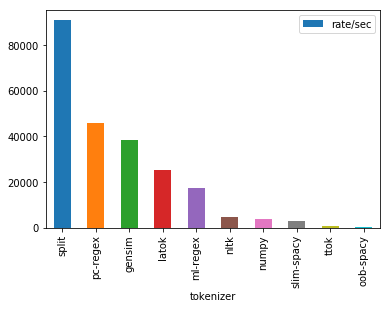

In [2]:
%matplotlib inline
df.plot.bar(x='tokenizer', y='rate/sec')

In [5]:
data2 = [
    ('pure-python-original', 1625.62, 'unoptimized proof of concept'),
    ('pure-python-optimized-01', 2230.65, 'transpose matrix for row access after build'),
    ('pure-python-optimized-02', 2498.44, 'pre-compute rolling features'),
    ('pure-python-optimized-03', 2502.59, 'use set instead of string for twitter specials'),
    ('pure-python-optimized-04', 2524.06, "don't set vars for unused/unneeded rows"),
    ('pure-python-optimized-05', 2577.46, 'use np.flat(iter) for for loop'),
    ('pure-python-optimized-06', 2608.76, 'combine block masks for one call'),
    ('pure-python-optimized-07', 2628.88, 'change "&", "|" to "*", "+"'),
    ('pure-python-optimized-08', 2652.68, 'manually create idx counter instead of using enumerate'),
    ('pure-python-optimized-09', 3346.93, "don't do ternary variable sets, only set a value if needed"),
    ('pure-python-optimized-10', 3577.66, 'use function local instead of class variable references'),
    ('pure-python-optimized-11', 4309.94, 'use generator; use "strip" instead of list comprehension'),
    ('c-ext-gen-parse-matrix', 11582.94, 'c-extension to generate feature matrix'),
    ('c-ext-gen-block-mask', 15750.75, 'c-extension to generate block mask'),
    ('c-ext-combine-matrix-rows', 25270.85, 'c-extension to combine matrix rows'),
]

df2 = pd.DataFrame(data2)
df2.columns = ['version', 'rate/sec', 'description']
df2.sort_values('rate/sec', ascending=True, inplace=True)
df2

,version,rate/sec,description
0,pure-python-original,1625.62,unoptimized proof of concept
1,pure-python-optimized-01,2230.65,transpose matrix for row access after build
2,pure-python-optimized-02,2498.44,pre-compute rolling features
3,pure-python-optimized-03,2502.59,use set instead of string for twitter specials
4,pure-python-optimized-04,2524.06,don't set vars for unused/unneeded rows
5,pure-python-optimized-05,2577.46,use np.flat(iter) for for loop
6,pure-python-optimized-06,2608.76,combine block masks for one call
7,pure-python-optimized-07,2628.88,"change ""&"", ""|"" to ""*"", ""+"""
8,pure-python-optimized-08,2652.68,manually create idx counter instead of using e...
9,pure-python-optimized-09,3346.93,"don't do ternary variable sets, only set a val..."


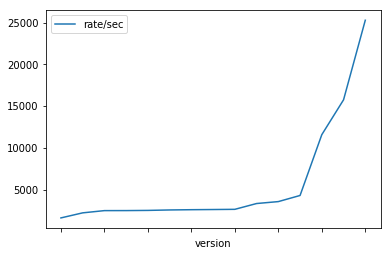

In [6]:
df2.plot(x='version', y='rate/sec')